## Predictor

*Age : Age of the patient  
Sex : Sex of the patient  
exang: exercise induced angina (1 = yes; 0 = no)  
ca: number of major vessels (0-3)  
cp : Chest Pain type chest pain type  
Value 1: typical angina  
Value 2: atypical angina  
Value 3: non-anginal pain  
Value 4: asymptomatic  
trtbps : resting blood pressure (in mm Hg)  
chol : cholestoral in mg/dl fetched via BMI sensor  
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
rest_ecg : resting electrocardiographic results  
Value 0: normal  
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
thalach : maximum heart rate achieved  
target : 0= less chance of heart attack 1= more chance of heart attack*  

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve,roc_auc_score

In [127]:
import os

In [128]:
os.chdir("E:\Aakash\PGDDS\Kaggle\Heart Attack Predictor")

In [129]:
df = pd.read_csv("heart.csv")

In [130]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [132]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

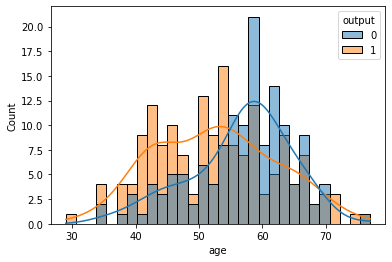

In [133]:
sns.histplot(data=df,x="age",hue="output",bins=30, kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

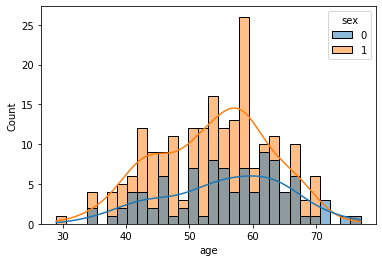

In [134]:
sns.histplot(data=df,x="age",hue="sex",bins=30, kde=True)

<AxesSubplot:xlabel='thalachh', ylabel='Count'>

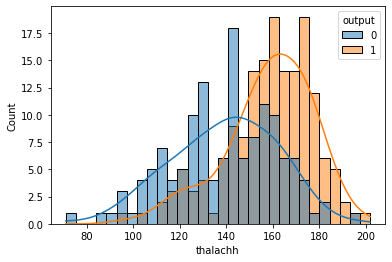

In [135]:
sns.histplot(data=df,x="thalachh",hue="output",bins=30, kde=True)

<AxesSubplot:xlabel='output', ylabel='trtbps'>

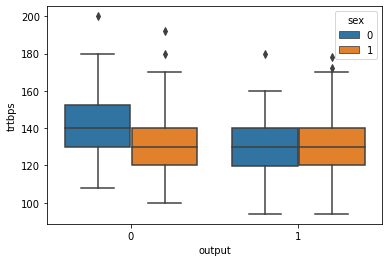

In [136]:
sns.boxplot(data=df,x="output",y="trtbps",hue="sex")

<AxesSubplot:xlabel='output', ylabel='oldpeak'>

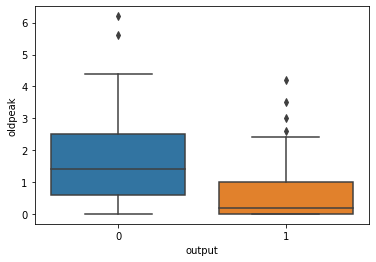

In [137]:
sns.boxplot(data=df,x="output",y="oldpeak")

<AxesSubplot:xlabel='sex', ylabel='count'>

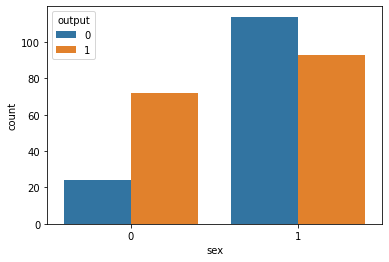

In [138]:
sns.countplot(data=df,x="sex",hue="output")

<AxesSubplot:xlabel='fbs', ylabel='count'>

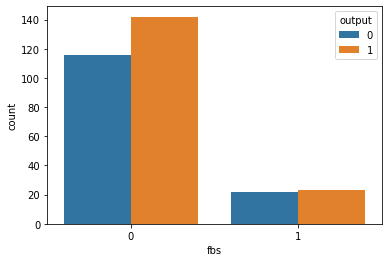

In [139]:
sns.countplot(data=df,x="fbs",hue="output")

<AxesSubplot:xlabel='exng', ylabel='count'>

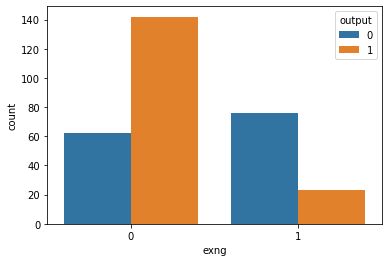

In [140]:
sns.countplot(data=df,x="exng",hue="output")

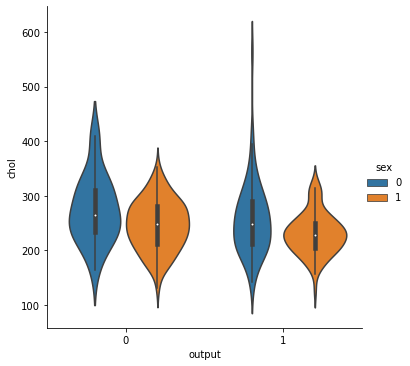

In [141]:
sns.catplot(data=df,x="output",y="chol",hue="sex",kind="violin")

<AxesSubplot:xlabel='age', ylabel='chol'>

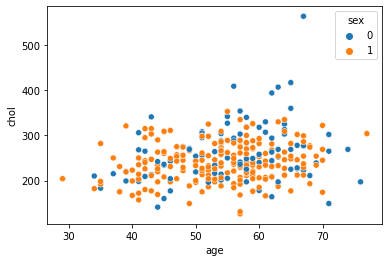

In [142]:
sns.scatterplot(data=df,x="age",y="chol",hue="sex")

<AxesSubplot:xlabel='output', ylabel='chol'>

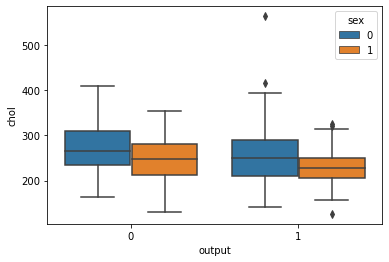

In [143]:
sns.boxplot(data=df,x="output",y="chol",hue="sex")

<AxesSubplot:xlabel='cp', ylabel='count'>

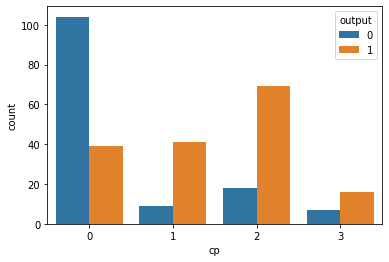

In [144]:
sns.countplot(data=df,x="cp",hue="output")

In [145]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

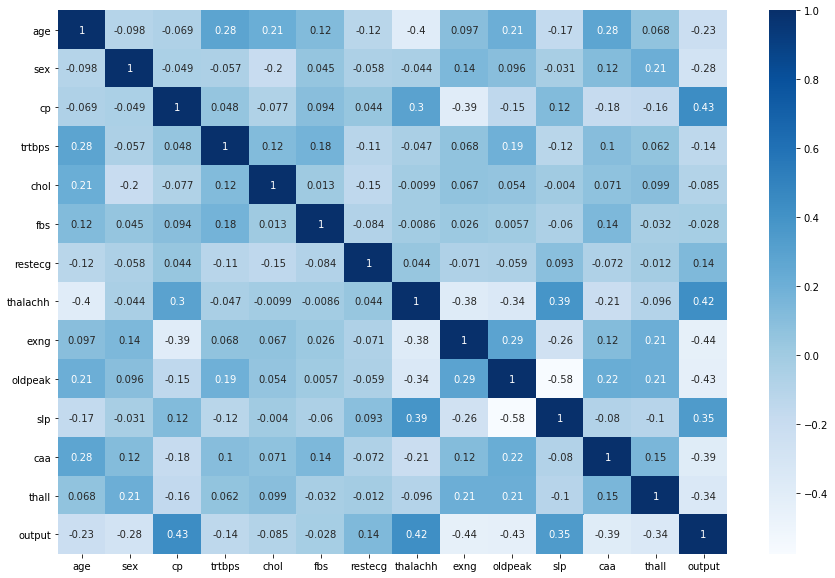

In [146]:
fig=plt.figure(figsize=(15,10))
fig=sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [147]:
for col in df.columns:
    print(col,"\n",df[col].value_counts(),"\n"*3)

age 
 58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64 



sex 
 1    207
0     96
Name: sex, dtype: int64 



cp 
 0    143
2     87
1     50
3     23
Name: cp, dtype: int64 



trtbps 
 120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     

In [148]:
#df.replace({"restecg":{0 : "Normal", 1 : "ST-T", 2 : "Left_ventri"}},inplace=True)
df.replace({"cp":{0: "typical",1: "atypical", 2: "non-anginal", 3: "asymptomatic"}},inplace=True)

In [149]:
df=df.join(pd.get_dummies(df.cp,drop_first=True))
df.drop('cp',axis=1,inplace=True)

In [150]:
df.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,atypical,non-anginal,typical
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,1


In [151]:
df.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output', 'atypical', 'non-anginal',
       'typical'],
      dtype='object')

In [152]:
dataset=df[['age', 'sex','trtbps', 'chol', 'fbs','restecg', 'thalachh','exng', 'oldpeak','output']]

In [153]:
dataset.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,output
0,63,1,145,233,1,0,150,0,2.3,1
1,37,1,130,250,0,1,187,0,3.5,1
2,41,0,130,204,0,0,172,0,1.4,1
3,56,1,120,236,0,1,178,0,0.8,1
4,57,0,120,354,0,1,163,1,0.6,1


In [154]:
X=dataset.drop("output",axis=1)
y=dataset.output

In [155]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [156]:
model=LogisticRegression(max_iter=350)

In [157]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=350)

In [158]:
X_train_pred=model.predict(X_train)

In [159]:
print(classification_report(y_train,X_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        94
           1       0.76      0.84      0.80       118

    accuracy                           0.76       212
   macro avg       0.76      0.75      0.76       212
weighted avg       0.76      0.76      0.76       212



In [160]:
X_test_pred=model.predict(X_test)

In [161]:
print(classification_report(y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.80      0.87      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



## StatsModel Method

In [162]:
df.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output', 'atypical', 'non-anginal',
       'typical'],
      dtype='object')

In [163]:
new_df=df[['thalachh','oldpeak','sex','thall','output','typical','caa','trtbps','thall']]

In [164]:
X=new_df.drop('output', axis=1)
y=new_df.output

In [165]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [166]:
X_train_sm=sm.add_constant(X_train)

In [167]:
logmod=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()

In [168]:
logmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                  212
Model:                            GLM   Df Residuals:                      204
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -80.416
Date:                Thu, 06 May 2021   Deviance:                       160.83
Time:                        23:40:29   Pearson chi2:                     197.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4016      2.255      2.396      0.017       0.982       9.821
thalachh       0.0217      0.010      2.166      0.030       0.002       0.041
oldpeak       -0.6482      0.207     -3.139      0.002      -1.053      -0.243
sex           -1.2876      0.482     -2.671      0.008      -2.233      -0.343
thall         -0.4678      0.164     -2.844      0.004      -0.790      -0.145
typical       -2.2685      0.430     -5.270      0.000      -3.112      -1.425
caa           -0.5717      0.198     -2.893      0.004      -0.959      -0.184
trtbps        -0.0245      0.011     -2.161      0.031      -0.047      -0.002
thall         -0.4678      0.164     -2.844      0.004      -0.790      -0.145
==============================================================================
"""

In [169]:
pred_prob=logmod.predict(X_train_sm)

In [170]:
evaluate=pd.DataFrame()

In [171]:
evaluate["Actual"]=y_train

In [172]:
evaluate["Probability"]=pred_prob

evaluate["Prediction"]=evaluate.Probability.apply(lambda x: 1 if x>=0.3 else 0)

In [173]:
for i in list(range(45,66)):
    evaluate[i/100]=evaluate.Probability.apply(lambda x: 1 if x>i/100 else 0)

In [174]:
evaluate.head()

,Actual,Probability,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,...,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65
285,0,0.016290,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0.049811,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,1,0.882054,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57,1,0.762253,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
37,1,0.542529,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [175]:
curvature=pd.DataFrame()

In [176]:
curvature[["Cutoff","Accuracy","Precision","Recall","F1_Score"]]=""

In [177]:
for i in range(0,101):
    x=i/100
    cutoff=x
    accuracy=accuracy_score(evaluate.Actual,np.where(evaluate.Probability>=x,1,0))
    precision=precision_score(evaluate.Actual,np.where(evaluate.Probability>=x,1,0))
    recall=recall_score(evaluate.Actual,np.where(evaluate.Probability>=x,1,0))
    f1=f1_score(evaluate.Actual,np.where(evaluate.Probability>=x,1,0))
    curvature.loc[i,:]=[cutoff,accuracy,precision,recall,f1]

C:\Users\Skylight101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Skylight101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
curvature

,Cutoff,Accuracy,Precision,Recall,F1_Score
0,0.0,0.556604,0.556604,1.0,0.715152
1,0.01,0.580189,0.570048,1.0,0.726154
2,0.02,0.627358,0.598985,1.0,0.749206
3,0.03,0.636792,0.605128,1.0,0.753994
4,0.04,0.65566,0.617801,1.0,0.763754
...,...,...,...,...,...
96,0.96,0.542453,0.956522,0.186441,0.312057
97,0.97,0.509434,0.9375,0.127119,0.223881
98,0.98,0.495283,1.0,0.09322,0.170543
99,0.99,0.443396,0.0,0.0,0.0


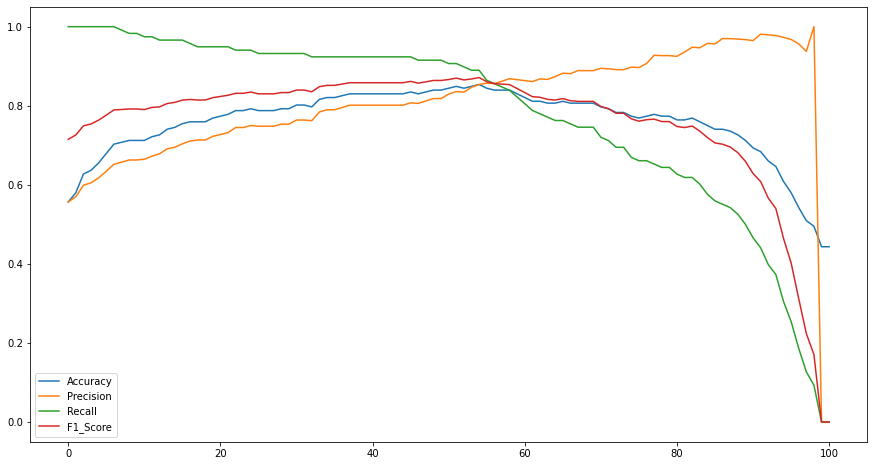

In [179]:
plt.figure(figsize=[15,8])
curvature.Accuracy.plot()
curvature.Precision.plot()
curvature.Recall.plot()
curvature.F1_Score.plot()
plt.legend()

In [180]:
X_test_pred=logmod.predict(sm.add_constant(X_test))

In [181]:
print(classification_report(y_test,np.where(X_test_pred>=0.562,1,0)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.88      0.89      0.88        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [182]:
a1,b1,c1=roc_curve(y_train,np.where(logmod.predict(sm.add_constant(X_train))>=0.562,1,0))
a2,b2,c2=roc_curve(y_test,np.where(logmod.predict(sm.add_constant(X_test))>=0.562,1,0))

No handles with labels found to put in legend.


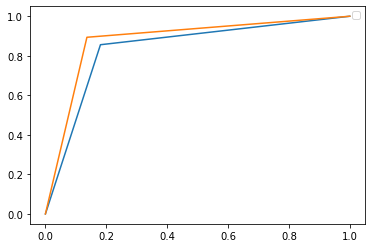

In [183]:
plt.plot(a1,b1)

plt.plot(a2,b2)

plt.legend()

In [184]:
print(roc_auc_score(y_train,np.where(logmod.predict(sm.add_constant(X_train))>=0.572,1,0)))
print(roc_auc_score(y_test,np.where(logmod.predict(sm.add_constant(X_test))>=0.572,1,0)))

0.8386224305805986
0.8679883945841393


In [185]:
print(roc_auc_score(y_train,np.where(logmod.predict(sm.add_constant(X_train))>=0.562,1,0)))
print(roc_auc_score(y_test,np.where(logmod.predict(sm.add_constant(X_test))>=0.562,1,0)))

0.8375405697800217
0.8786266924564796


In [186]:
u=0.01
scores=[]
while u<=1:
    scores.append((u,roc_auc_score(y_train,np.where(logmod.predict(sm.add_constant(X_train))>=u,1,0))))
    u=round(u+0.001,3)

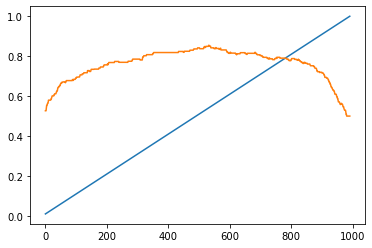

In [187]:
plt.plot(scores)